## week 4. PCA

In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

In [2]:
df_prices = pd.read_csv('close_prices.csv')
df_djia= pd.read_csv('djia_index.csv')

In [3]:
df_prices.head()

,date,AXP,BA,CAT,CSCO,CVX,DD,DIS,GE,GS,...,PFE,PG,T,TRV,UNH,UTX,V,VZ,WMT,XOM
0,2013-09-23,76.440002,117.510002,85.029999,24.270000,125.519997,59.409999,64.750000,24.280001,165.250000,...,28.799999,79.279999,34.220001,86.379997,71.820000,109.419998,196.240005,47.980000,76.419998,87.750000
1,2013-09-24,76.070000,119.000000,85.110001,24.139999,124.489998,59.319997,64.320000,24.320000,162.970001,...,28.709999,78.620003,34.090000,85.870003,72.320000,110.000000,193.339996,47.270000,75.750000,87.360001
2,2013-09-25,75.989998,118.510002,84.500000,24.430000,124.070000,59.319997,64.449997,24.230000,162.309998,...,28.490000,77.720001,34.049999,85.980003,71.980003,109.260002,191.559998,46.950001,74.650002,87.139999
3,2013-09-26,76.320000,119.379997,84.199997,23.770000,123.489998,59.509996,65.239998,24.250000,162.289993,...,28.520000,78.050003,34.230000,85.830002,72.160004,109.660004,193.559998,47.669998,74.620003,87.070000
4,2013-09-27,75.889999,118.739998,83.800003,23.330000,122.639999,59.009995,65.190002,24.049999,159.850006,...,28.879999,77.209999,33.980000,85.410004,71.989998,109.360001,193.050003,47.000000,74.360001,86.900002


In [4]:
df_prices.describe()

,AXP,BA,CAT,CSCO,CVX,DD,DIS,GE,GS,HD,...,PFE,PG,T,TRV,UNH,UTX,V,VZ,WMT,XOM
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,...,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,87.402139,130.740615,95.442888,24.434225,118.737513,67.156710,83.707273,25.846471,173.424144,87.340000,...,30.764465,82.720401,34.505775,93.444626,84.916257,112.316337,223.837246,48.616952,78.464171,95.183717
std,4.956179,8.478527,9.186264,2.296246,7.549846,4.986296,10.315030,0.946131,11.532799,11.727553,...,1.539853,3.980454,1.069843,8.018940,13.071112,5.274900,23.401029,1.401023,4.173109,5.044250
min,72.220001,114.470001,78.449997,20.240000,100.860001,56.939998,63.590000,23.570000,152.720001,74.139999,...,27.700001,75.589996,31.860001,80.260002,66.940002,99.169998,182.529999,45.419998,71.870003,83.870003
25%,84.504999,125.375000,86.055002,22.642499,113.904999,63.997499,76.287497,25.270000,163.505001,78.817503,...,29.592500,79.930000,33.842500,86.687500,74.692501,108.502500,209.077500,47.437500,75.620003,91.569998
50%,88.120003,129.069999,96.340001,24.500000,119.215000,66.675002,84.020001,25.905000,171.899994,81.005001,...,30.605001,81.805001,34.660000,92.854999,81.479999,112.970001,215.479996,48.785000,77.059998,95.079998
75%,90.977502,134.010006,103.659999,25.677500,124.220003,70.477504,90.347497,26.580000,183.535003,96.062498,...,31.805000,84.690002,35.279999,99.987499,93.812498,116.565001,240.234993,49.675000,79.907501,99.452499
max,95.839996,158.309998,111.400002,30.190001,134.850006,80.499997,107.970001,28.030001,196.889999,116.750000,...,34.869999,93.459999,36.740002,109.519997,119.959999,124.110001,278.290009,51.970001,90.470001,104.379997


In [5]:
str = ''
for name in df_prices.drop('date', axis=1).columns:
    str += name + ', '
print('Names of companies: {}'.format(str))

Names of companies: AXP, BA, CAT, CSCO, CVX, DD, DIS, GE, GS, HD, IBM, INTC, JNJ, JPM, KO, MCD, MMM, MRK, MSFT, NKE, PFE, PG, T, TRV, UNH, UTX, V, VZ, WMT, XOM, 


In [6]:
pca = PCA(n_components=10)

pca.fit(df_prices.drop('date',axis=1))

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [7]:
pca.explained_variance_ratio_

array([0.73897118, 0.11007169, 0.04995088, 0.0287492 , 0.02215448,
       0.01931577, 0.00674853, 0.00614091, 0.00320594, 0.00305611])

In [8]:
comsum = np.cumsum(pca.explained_variance_ratio_)
print('Процент объясненных данных в зав. от числа данных:') 
for i in range(0, len(comsum)):
    print('{} comp. - {} %'.format(i+1, round(comsum[i], 3)))

Процент объясненных данных в зав. от числа данных:
1 comp. - 0.739 %
2 comp. - 0.849 %
3 comp. - 0.899 %
4 comp. - 0.928 %
5 comp. - 0.95 %
6 comp. - 0.969 %
7 comp. - 0.976 %
8 comp. - 0.982 %
9 comp. - 0.985 %
10 comp. - 0.988 %


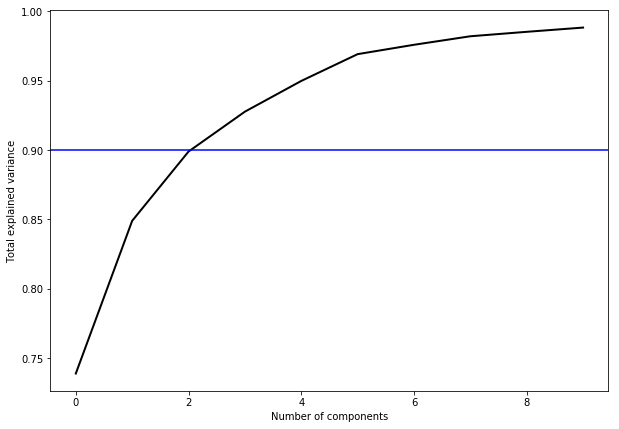

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.axhline(0.9, c='b')

plt.show();

In [10]:
df_prices_pca = pca.transform(df_prices.drop('date',axis=1))

In [11]:
#корреляция между главной компонентой PCA и индексом Джонса
np.corrcoef(df_prices_pca[:, 0], df_djia['^DJI'])

array([[1.        , 0.90965222],
       [0.90965222, 1.        ]])

In [26]:
print('Наибольший вклад в первую компоненту вносит компания: {}'.format( \
    df_prices.drop('date', axis=1).columns[np.argmax(pca.components_[0])]))

Наибольший вклад в первую компоненту вносит компания: V
